### TMLC Fellowship Program Solution Notebook

In [83]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [84]:
# Importing nltk library
import nltk

In [88]:
df = pd.read_csv("ecommerceDataset.csv",names = ["class","description"], sep=',')


In [89]:
df.head()

,class,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [90]:
df.dtypes

class          object
description    object
dtype: object

In [91]:
df.shape

(50425, 2)

In [92]:
df.isna().sum()

class          0
description    1
dtype: int64

- Dropping the missing value row

In [93]:
df = df.dropna()

In [94]:
df.shape

(50424, 2)

In [95]:
df.describe()

,class,description
count,50424,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [96]:
df.head(10)

,class,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
5,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
6,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
7,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
8,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...
9,Household,Paintings Villa UV Textured Modern Art Print F...


In [97]:
# Since the one row is dropped then we need to reset the index.
df.reset_index(inplace=True)

In [98]:
df.head(10)

,index,class,description
0,0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,4,Household,Incredible Gifts India Wooden Happy Birthday U...
5,5,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
6,6,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
7,7,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
8,8,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...
9,9,Household,Paintings Villa UV Textured Modern Art Print F...


In [99]:
df['class'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: class, dtype: int64

In [100]:
df.shape

(50424, 3)

In [101]:
df.describe()

,index
count,50424.000000
mean,25211.720014
std,14556.596563
min,0.000000
25%,12605.750000
50%,25211.500000
75%,37817.250000
max,50424.000000


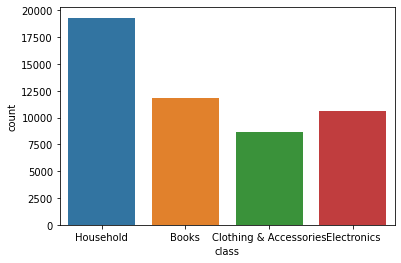

In [102]:
sns.countplot(df['class'])

In [103]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Text Preprocessing

- Lower casing

In [104]:
df["description"] = df["description"].str.lower()
df.head()

,index,class,description
0,0,Household,paper plane design framed wall hanging motivat...
1,1,Household,"saf 'floral' framed painting (wood, 30 inch x ..."
2,2,Household,saf 'uv textured modern art print framed' pain...
3,3,Household,"saf flower print framed painting (synthetic, 1..."
4,4,Household,incredible gifts india wooden happy birthday u...


In [105]:
df['description'][1]

"saf 'floral' framed painting (wood, 30 inch x 10 inch, special effect uv print textured, sao297) painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. this is an special series of paintings which makes your wall very beautiful and gives a royal touch (a perfect gift for your special ones)."

- Removal of Punctuations

In [106]:
#function to remove the punctuation
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["description"] = df["description"].apply(lambda text: remove_punctuation(text))
df.head()

,index,class,description
0,0,Household,paper plane design framed wall hanging motivat...
1,1,Household,saf floral framed painting wood 30 inch x 10 i...
2,2,Household,saf uv textured modern art print framed painti...
3,3,Household,saf flower print framed painting synthetic 135...
4,4,Household,incredible gifts india wooden happy birthday u...


In [107]:
df['description'][1]

'saf floral framed painting wood 30 inch x 10 inch special effect uv print textured sao297 painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it this is an special series of paintings which makes your wall very beautiful and gives a royal touch a perfect gift for your special ones'

- Removing stopwords

In [108]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [109]:
df['description']=df['description'].apply(process_text)

In [ ]:
df['description'][1]

'saf floral framed painting wood 30 inch x 10 inch special effect uv print textured sao297 painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch perfect gift special ones'

- Stemming

In [110]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['description']=df['description'].apply(stemming)
df.head()    

,index,class,description
0,0,Household,paper plane design framed wall hanging motivat...
1,1,Household,saf floral framed painting wood 30 inch x 10 i...
2,2,Household,saf uv textured modern art print framed painti...
3,3,Household,saf flower print framed painting synthetic 135...
4,4,Household,incredible gifts india wooden happy birthday u...


In [111]:
df['description']

0        paper plane design framed wall hanging motivat...
1        saf floral framed painting wood 30 inch x 10 i...
2        saf uv textured modern art print framed painti...
3        saf flower print framed painting synthetic 135...
4        incredible gifts india wooden happy birthday u...
                               ...                        
50419    strontium microsd class 10 8gb memory card bla...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w4 white karbonn titaniu...
50422    samsung guru fm plus smb110ed black colourblac...
50423                       micromax canvas win w121 white
Name: description, Length: 50424, dtype: object

- Creating the Bag of Words model

In [112]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(df['description'])

In [113]:
X.shape

(50424, 5000)

In [114]:
y = df['class']

- Splitting the data

In [115]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [117]:
cv.get_feature_names()[:30]

['05',
 '10',
 '10 meters',
 '100',
 '100 brand',
 '100 brand new',
 '100 cotton',
 '100 cotton fabric',
 '100 percent',
 '1000',
 '101',
 '105',
 '1080p',
 '10mm',
 '11',
 '110',
 '12',
 '12 inch',
 '120',
 '1200',
 '125',
 '12v',
 '13',
 '14',
 '144',
 '15',
 '15 years',
 '150',
 '156',
 '156inch']

In [118]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### MultinomialNB Algorithm

In [120]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [121]:
y_pred = nb.predict(X_test)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

                 Books       0.97      0.89      0.93      3869
Clothing & Accessories       0.93      0.98      0.95      2892
           Electronics       0.91      0.92      0.92      3482
             Household       0.92      0.94      0.93      6397

              accuracy                           0.93     16640
             macro avg       0.93      0.93      0.93     16640
          weighted avg       0.93      0.93      0.93     16640



**Since the given data is imbalanced (class imbalance problem) so we also need to focus on recall value with accuracy for model evaluation**

Here, the accuracy is 93%

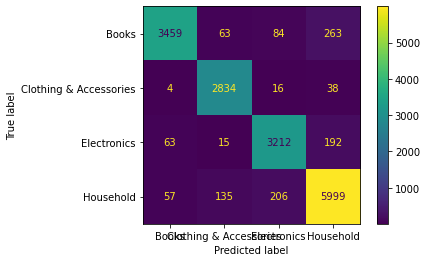

In [123]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

### SVM

In [124]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [125]:
y_pred = svm.predict(X_test)

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

                 Books       0.92      0.95      0.93      3869
Clothing & Accessories       0.98      0.95      0.97      2892
           Electronics       0.96      0.93      0.95      3482
             Household       0.95      0.96      0.95      6397

              accuracy                           0.95     16640
             macro avg       0.95      0.95      0.95     16640
          weighted avg       0.95      0.95      0.95     16640



Here, the accuracy is 95% which is better than the multinomial naive bayes model.

Also, the **recall value** is much **better** than the multinomial naive bayes model. 

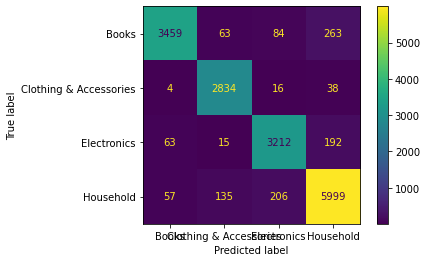

In [127]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

- **Conclusion**

So for this problem it's better to use SVM (support vector machine) model for classification.